# Some Notes on Correlation ¶
> "Here are some notes on correlation and related measures such as predictive power score. These can be used for exploring your data prior to modeling or just for analysis"

- toc: false
- image: /images/iris_pairwise.png
- author: "Dwight Gunning"
- branch: master
- badges: true
- comments: true

![Iris Pairwise](../images/iris_pairwise.png)

When starting a data science project, you will want to understand the data that you have, how they are related, and whether it would be feasible to extract patterns from the data. One measure commonly used is **correlation** - which tells you the strength of the relationship among the data. 

This artical looks at ways to measure data relationships, using various measures of **correlation**, and some related measures that might be better such as **predictive power score**

## Setup - Imports

In [268]:
import sklearn.datasets
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import re

## Finding and Loading Datasets
The `sklearn.datasets` package contains several functions to load datasets. These functions are used throughout the scikit-learn documentation of the various algorithms. These datasets are easy to use, and in any event it is quite a useful skill to know how to load sample datasets from the different machine learning libraries.

The code below lists the datasets in the `sklearn.datasets` package.

#### Tip: Use the `dir` function to list the contents of a package

In [269]:
pd.DataFrame({'some scikit-learn functions to load data' : 
            [m for m in all_funcs if re.match('fetch|make|load', m)] 
             }
            ).sample(12).style.hide_index()       

some scikit-learn functions to load data
fetch_20newsgroups_vectorized
fetch_covtype
load_sample_images
make_multilabel_classification
make_circles
fetch_california_housing
make_gaussian_quantiles
load_breast_cancer
make_sparse_spd_matrix
load_files


## Load Iris Data
We will choose the iris dataset since it is a small, easy to understand dataset that is commonly used for examples in **scikit-learn** and other machine learning libraries. We use the `load_iris` function to load the iris data. The function parameters `return_X_y`, and `as_frame` are self-explanatory, but pay attention to what they do, as it affects the shape of your data and how you can do machine learning afterwards.


In [201]:
X, y = load_iris(return_X_y=True, as_frame=True)
X.describe().round(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


There are four features - **sepal length**, **sepal width**, **petal length** and **petal width**. These are all numeric, continuous features, and there are no  missing values, which makes it easier to compute correlation.

## About Correlation
Correlation is a way of measuring how closely your data items are reated. If you have a dataframe, the easiest way to compute the correlation among your features is to use the dataframe `corr`. Within the `corr` function there are three methods used to calculate correlation. 

#### Pearson
- There is a linear relationship
- The data is normal
- For *interval* or *ratio* data - not for *categorical* or *ordinal* data

#### Spearman
- *Interval* or *ratio* or *ordinal* data - not for *categorical*
- Monotonic relationship - either always increasing or always decreasing

![Monotonic](../images/monotonic.png)

#### Kendall
 - Ordinal data 
 - The data does **not** have to be normal
 - Returns values from **0 : no relationship** to **1 : perfect relationship**. (Oddly, Kendall can produce negative values which can be ignored)


|  Type of data |   Description | Correlation Method |
|----:|----:|----:|
|   Interval |   Numeric data measured along a regular range e.g. temperature  |Pearson, Spearman|
|   Ratio |   Numeric data, but 0 means there are none of that variable  |Pearson, Spearman|
|   Ordinal |   Categorical data that can be ordered e.g."How much do you like ice cream" |Kendall, Spearman|
|   Nominal |   Data with two or more categories e.g. "What type of house do you live in"||

### Chart using different correlation methods
The pandas dataframe `corr` function computes the correlation using one of 3 methods. **Pearson** is the default, standard measure. **Spearman** and **Kendall** are recommended if there are concerns about whether the data is normal. 

In [179]:

def chart_correlation(data, method='pearson'):
    # Calculate the correlation among the columns
    X_corr = X.corr(method=method) 
    
    # Use only two decimal places. You don't need to but looks nicer
    with pd.option_context('display.precision', 2):
        
        # Use a sea green color palette
        cm = sns.light_palette("seagreen", as_cmap=True)
        
        return (
                X_corr # This is all the method needs to return
                       # But styling makes it look nicer
                    .style.background_gradient(cmap=cm, 
                                               low=-0.6,
                                                high=0.2)
                .set_caption(f'Iris dataset - {method} correlation')
               )

In [180]:
chart_correlation(X, 'pearson')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.00,-0.12,0.87,0.82
sepal width (cm),-0.12,1.00,-0.43,-0.37
petal length (cm),0.87,-0.43,1.00,0.96
petal width (cm),0.82,-0.37,0.96,1.00


In [181]:
chart_correlation(X, 'spearman')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.00,-0.17,0.88,0.83
sepal width (cm),-0.17,1.00,-0.31,-0.29
petal length (cm),0.88,-0.31,1.00,0.94
petal width (cm),0.83,-0.29,0.94,1.00


In [182]:
chart_correlation(X, 'kendall')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.00,-0.08,0.72,0.66
sepal width (cm),-0.08,1.00,-0.19,-0.16
petal length (cm),0.72,-0.19,1.00,0.81
petal width (cm),0.66,-0.16,0.81,1.00


## Distance Correlation

Distance correlation ranges from **0-2**. 0 means **perfect correlation**, 1 means **no correlation** and 2 being **perfect anticorrelation**. A small correlation means that the points are close in correlational space.


See [StackOverflow Distance Correlation](https://stackoverflow.com/questions/35988933/scipy-distance-correlation-is-higher-than-1)

In [185]:
from scipy.spatial import distance

In [186]:
def chart_distance_correlation(data):
    dist_corr = lambda column1, column2: distance.correlation(column1, column2)
    result = data.apply(lambda col1: data.apply(lambda col2: dist_corr(col1, col2)))
    with pd.option_context('display.precision', 2):
        
        # Use a sea green color palette
        cm = sns.light_palette("seagreen", as_cmap=True)
        return (
            result.style.background_gradient(cmap=cm, low=-0.1, high=0.2)
                .set_caption(f'Iris dataset - distance correlation')
        )
    
chart_distance_correlation(X)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.00,1.12,0.13,0.18
sepal width (cm),1.12,0.00,1.43,1.37
petal length (cm),0.13,1.43,0.00,0.04
petal width (cm),0.18,1.37,0.04,0.00


## Pairwise Plot

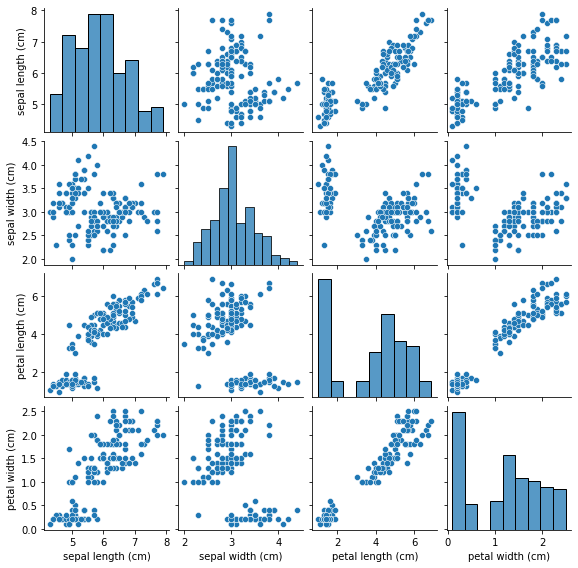

In [256]:
sns.pairplot(X, height=2);

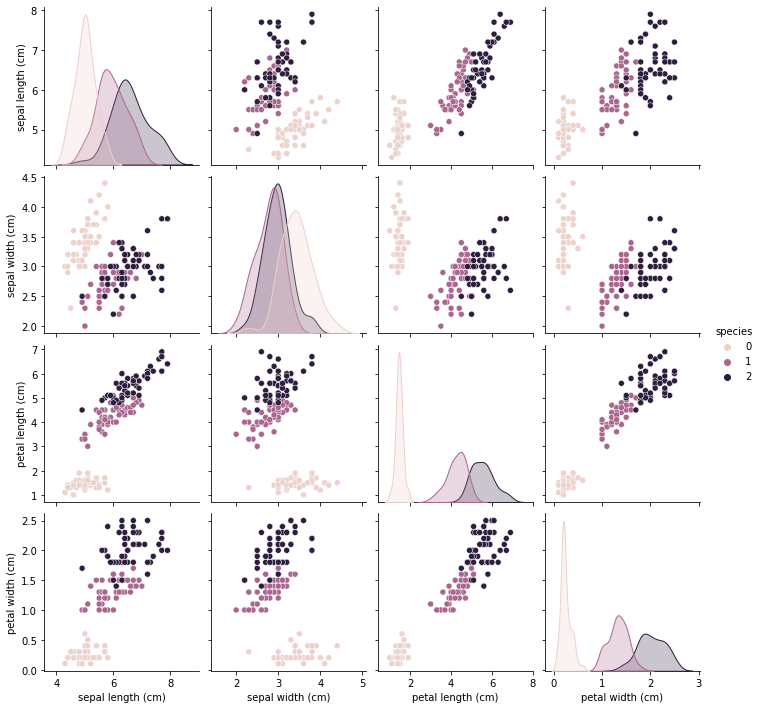

In [267]:
sns.pairplot(pd.concat([X,y], axis=1).rename(columns=({'target':'species'})), hue='species');

## Predictive Power Score - A Better Correlation

In [244]:
import seaborn as sns
cm = sns.light_palette("seagreen", as_cmap=True)
pps.matrix(X)[['x', 'y', 'ppscore']]\
            .pivot(columns='x', index='y', values='ppscore')\
            .style.background_gradient()\
            .set_precision(3)\
            .set_caption('Predictive Power Score')


x,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm)
y,,,,
petal length (cm),1.000,0.798,0.550,0.172
petal width (cm),0.745,1.000,0.432,0.133
sepal length (cm),0.526,0.384,1.000,0.007
sepal width (cm),0.052,0.255,0.000,1.000


## References

- [Kendall's Tau Correlation](https://www.statisticshowto.com/kendalls-tau)